# Stock Market Analysis & Prediction

## Stock Market Analysis

### Import Necessary Libraries

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data 
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime


### Extracting the Data

In [3]:
# The stocks i`m using for the analysis
tech_list = ['AAPL', 'GOOG', 'META', 'AMZN']

# Extract Data for the last 5 years
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day) 

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, META, AMZN]
company_name = ["APPLE", "GOOGLE", "META", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Descriptive the Data

In [4]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,217.001876,220.084110,214.080016,217.098967,217.098967,2.440359e+07
std,67.657629,68.202179,67.005203,67.615484,67.615484,1.721498e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,167.862503,170.979996,165.660004,168.785000,168.785000,1.493712e+07
50%,194.720001,197.394997,192.169998,194.595001,194.595001,2.013275e+07
75%,267.930008,270.452499,263.959999,266.937508,266.937508,2.835195e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [5]:
for cname in company_list:
  print(cname.shape)

(1258, 7)
(1258, 7)
(1258, 7)
(1258, 7)


In [6]:
META.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-03-02 to 2023-03-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Adj Close     1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   company_name  1258 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


### Visualize the Data

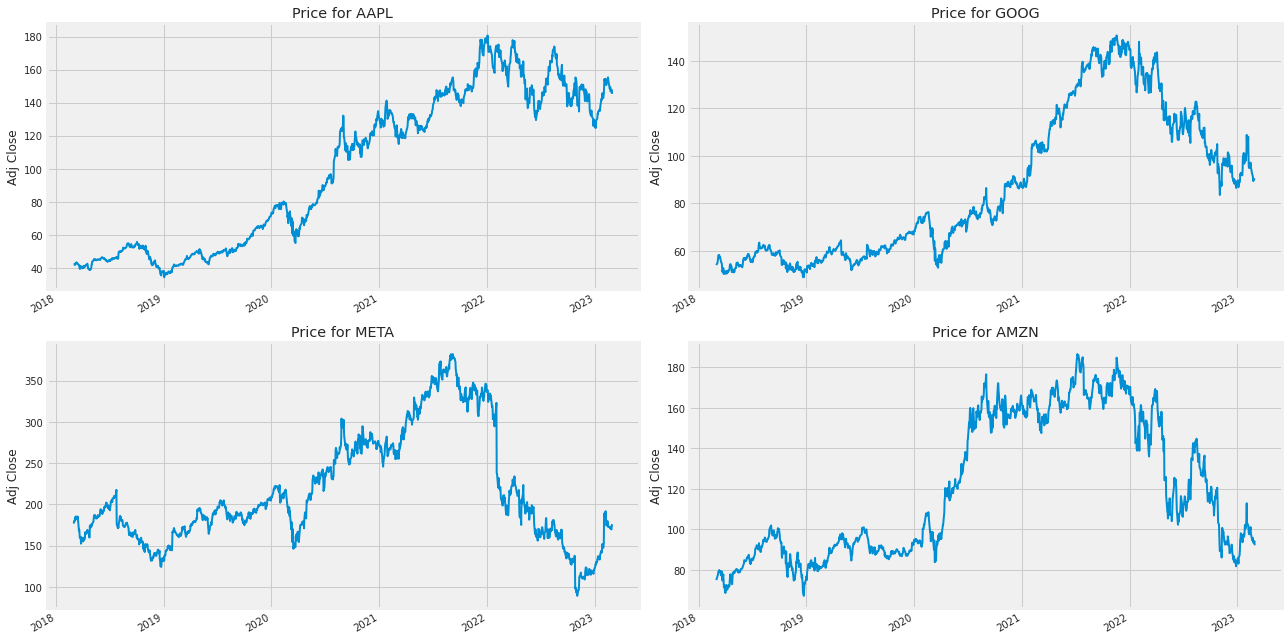

In [7]:
# Let's see 5 years of closing prices
plt.figure(figsize=(18, 9))


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=2.0)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Price for {tech_list[i - 1]}")

    
plt.tight_layout()

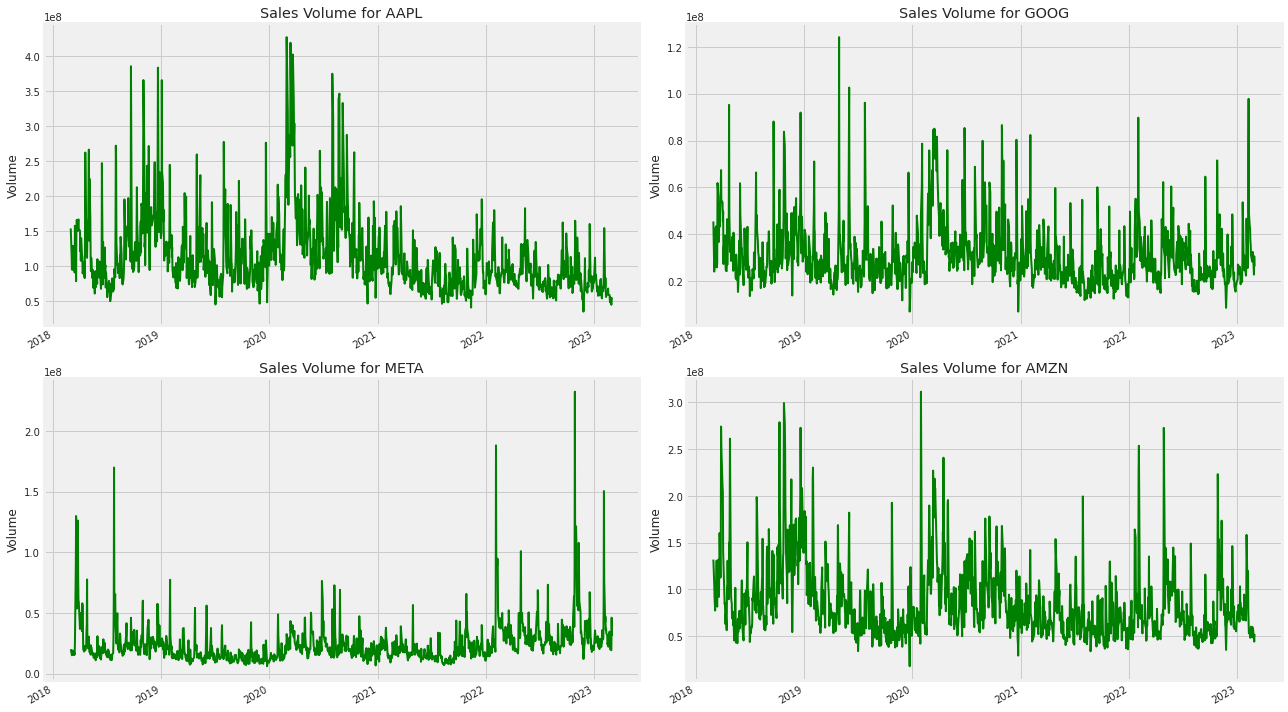

In [8]:
# Now let's plot the volume of stocks
plt.figure(figsize=(18, 10))


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth=2.0, color="g")
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

### Find And Plot Moving Average`s (MA)

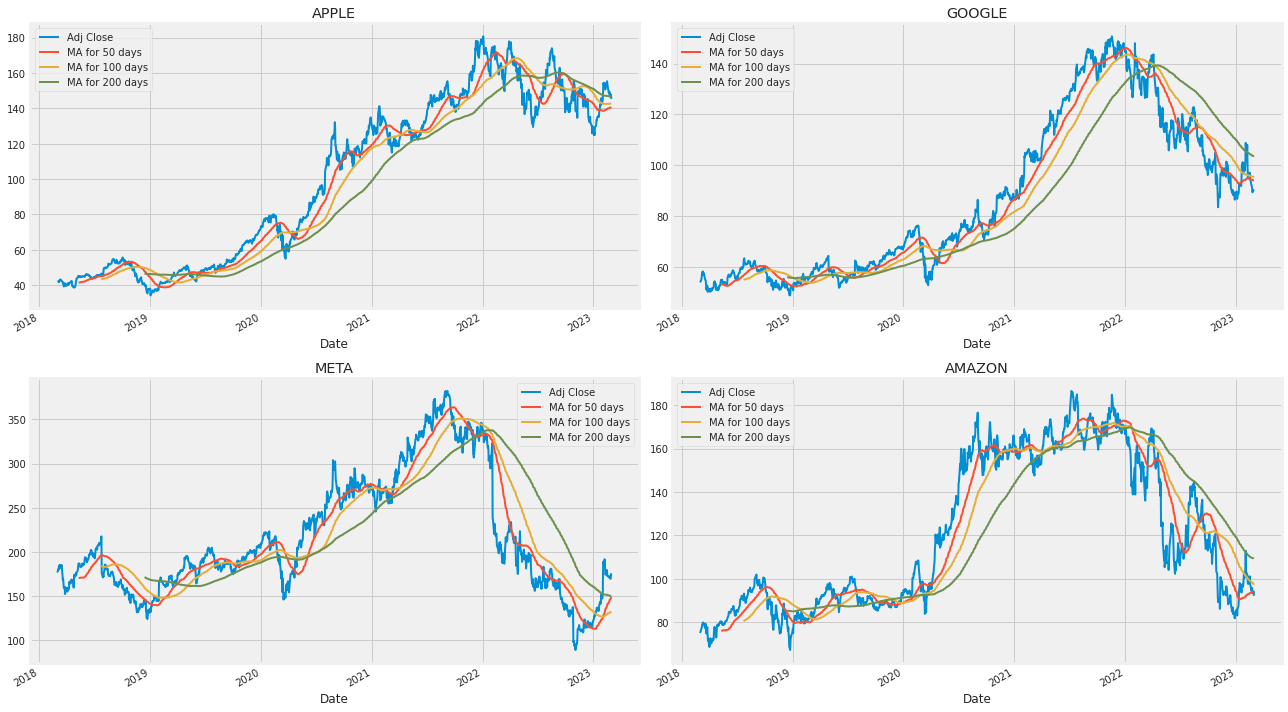

In [9]:
ma_day = [50, 100, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(18)

AAPL[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,0],linewidth=2.0)
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,1],linewidth=2.0)
axes[0,1].set_title('GOOGLE')

META[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,0],linewidth=2.0)
axes[1,0].set_title('META')

AMZN[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,1],linewidth=2.0)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Find Daily Average Returns

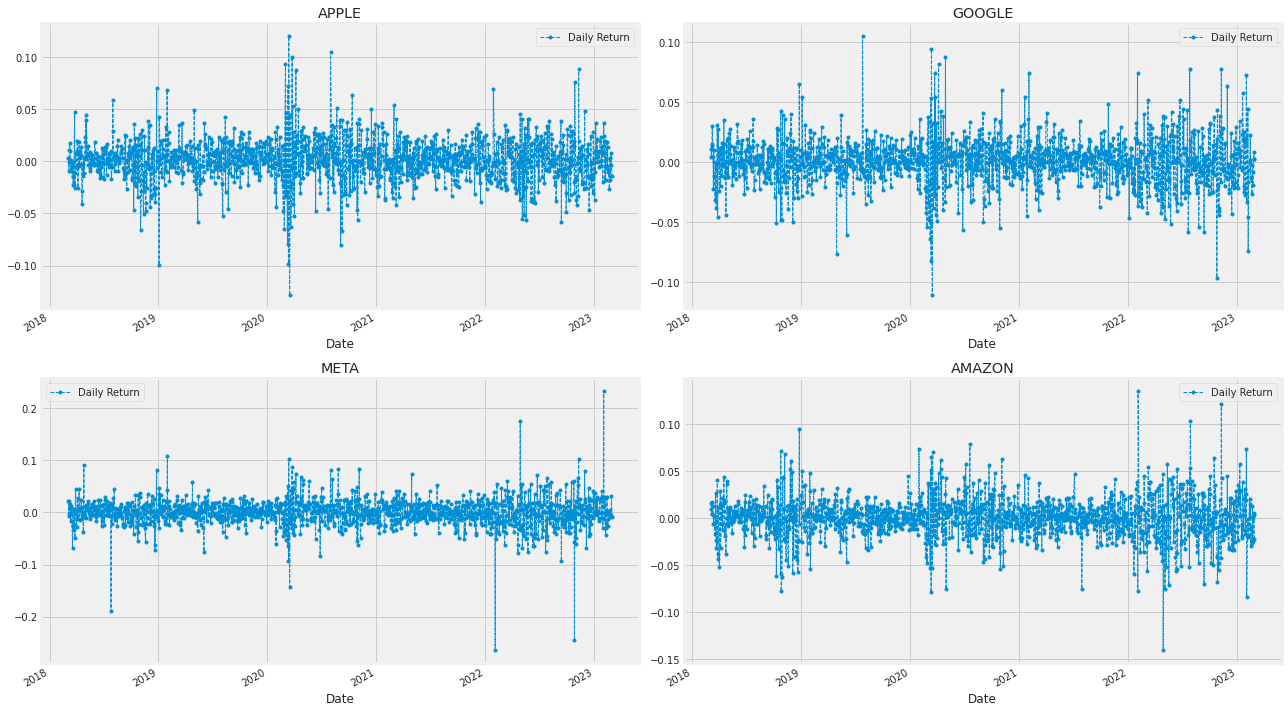

In [10]:
# pct_change - will find percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(18)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='.',linewidth=1.0)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='.',linewidth=1.0)
axes[0,1].set_title('GOOGLE')

META['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='.',linewidth=1.0)
axes[1,0].set_title('META')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='.',linewidth=1.0)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Daily Returns Distribution

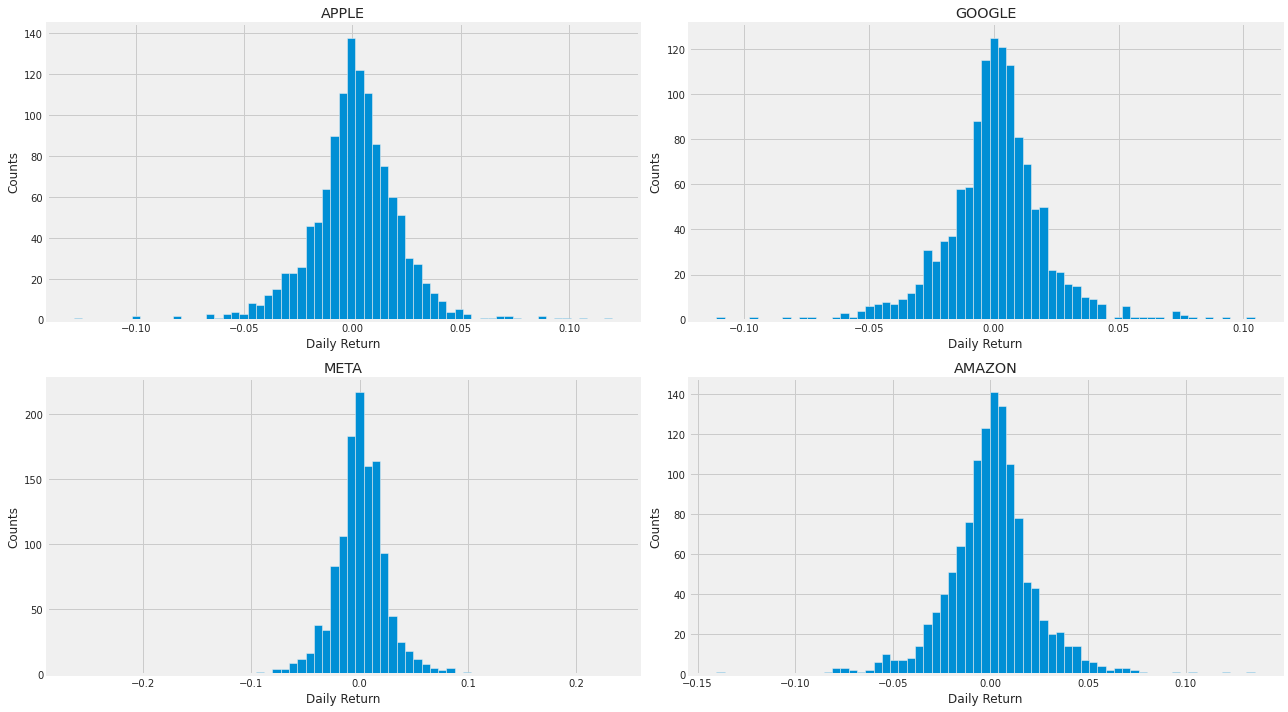

In [11]:
plt.figure(figsize=(18, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=65)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

### Correlation Between Stocks Closing Prices

In [12]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Tech returns DataFrame
tech_rets = closing_df.pct_change().dropna()
tech_rets.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,META
Date,,,,
2023-02-23,0.003291,0.000313,-0.007952,0.005376
2023-02-24,-0.018005,-0.024212,-0.018887,-0.009591
2023-02-27,0.008248,0.002781,0.008394,-0.004989
2023-02-28,-0.003448,0.005013,0.002220,0.031851
2023-03-01,-0.014246,-0.021861,0.002326,-0.008689


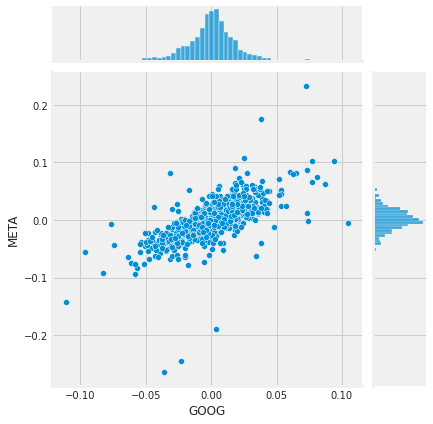

In [13]:
# Compare Google and META
sns.jointplot(x='GOOG', y='META', data=tech_rets, kind='scatter')
plt.show()

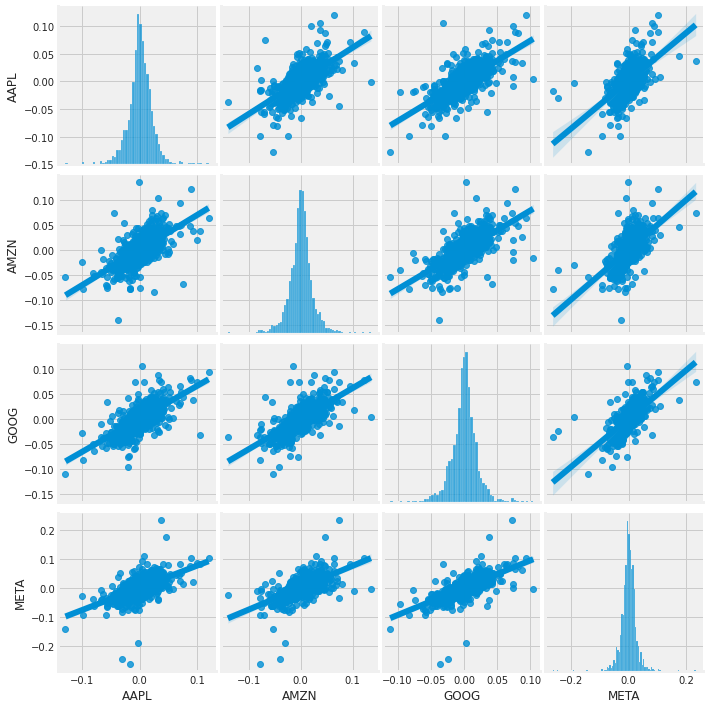

In [14]:
# All the comparisons
sns.pairplot(tech_rets, kind='reg')

Stocks are positivley correlated with each other with a linear relationship bewteen their daily returns.

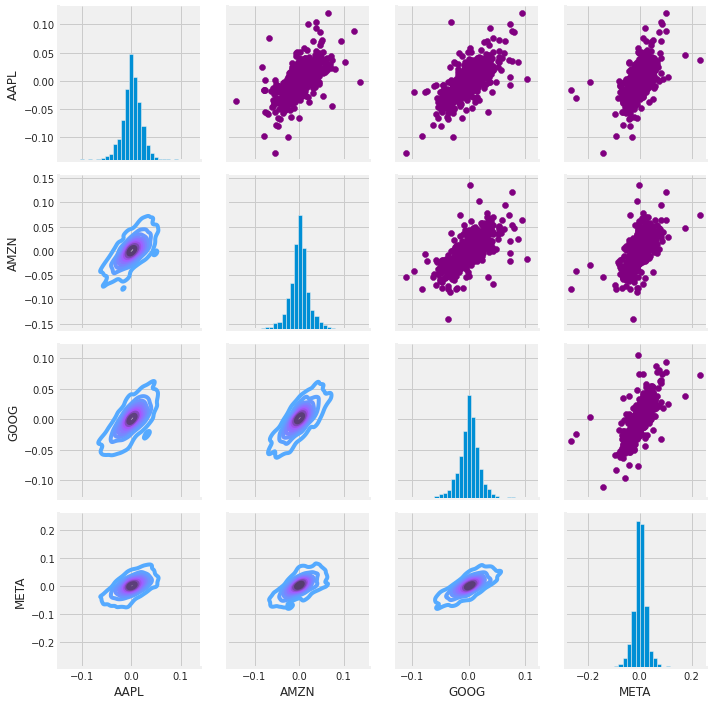

In [15]:
# Set up our figure
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify the figure
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

### Correlation Daily Returns

Text(0.5, 1.0, 'Correlation of stock closing price')

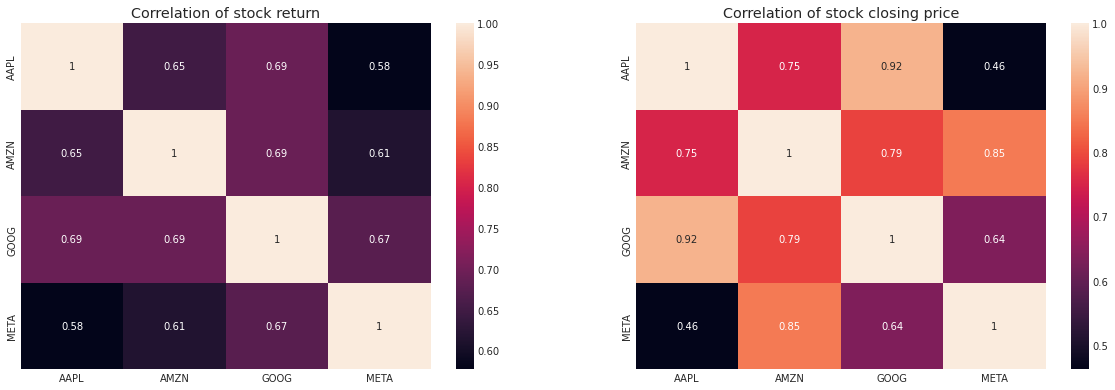

In [16]:
plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='rocket')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='rocket')
plt.title('Correlation of stock closing price')

### Risk For Investing vs Expected Returns

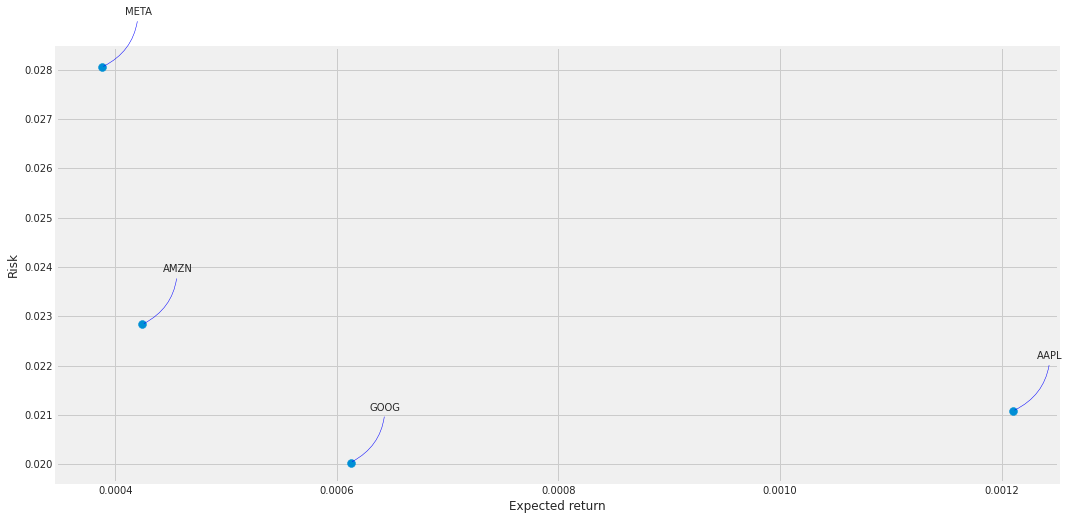

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(16, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Lowest risk highest return investment is : APPLE 

## Predicting The Price of APPLE Stock

### Get APPLE Data


In [18]:
df = pdr.get_data_yahoo('AAPL', start='2005-01-01', end=datetime.now())
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.961916,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.971795,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.980306,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.981066,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.052499,2227450400
...,...,...,...,...,...,...
2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500


### Visualizing Historical Prices

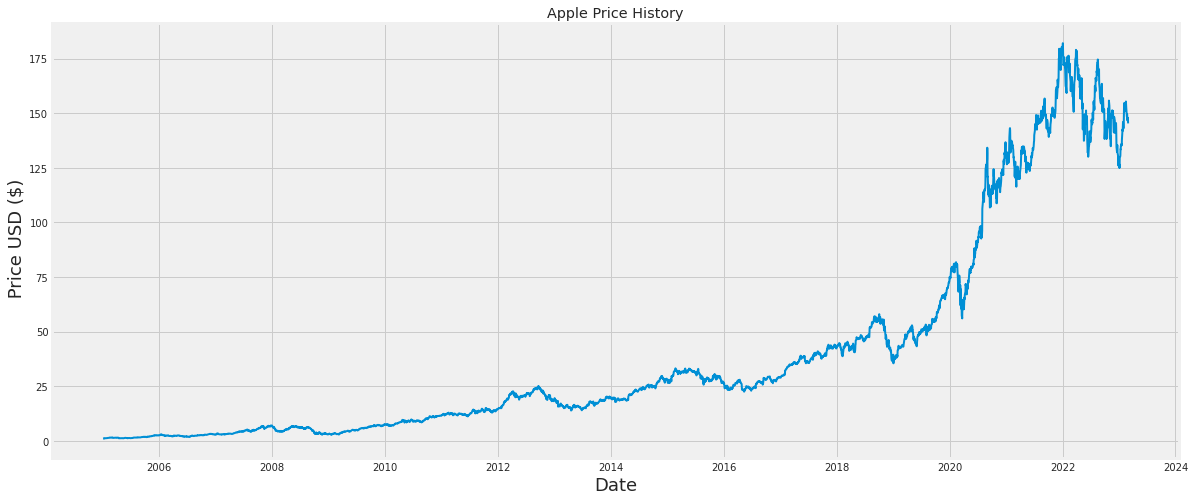

In [19]:
plt.figure(figsize=(18,8))
plt.title('Apple Price History')
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel(' Price USD ($)', fontsize=18)
plt.show()

### Prepare The Data


In [20]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

4343

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [6.41693030e-05],
       [1.19454579e-04],
       ...,
       [8.11532336e-01],
       [8.08712814e-01],
       [7.97102862e-01]])

### Split the Data

In [22]:
# Create the traning data set
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

         
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

### Build LSTM Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4283/4283 [==============================] - 143s 32ms/step - loss: 0.0010


### Let`s Predict 

In [24]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 2s 42ms/step


7.584592807049539

<ipython-input-25-10605a011422>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


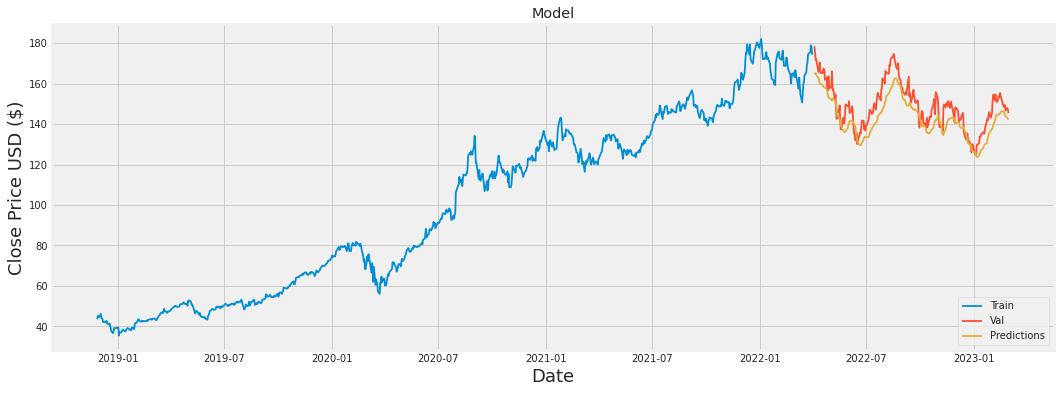

In [25]:
# Plot the data
train = data.iloc[3500:4343]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=1.8)
plt.plot(valid[['Close', 'Predictions']], linewidth=1.8)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

,Close,Predictions
Date,,
2022-04-04,178.440002,164.607971
2022-04-05,175.059998,165.099457
2022-04-06,171.830002,165.091019
2022-04-07,172.139999,164.385849
2022-04-08,170.089996,163.694946
...,...,...
2023-02-23,149.399994,144.489380
2023-02-24,146.710007,143.907684
2023-02-27,147.919998,143.057953


End of analysis